# Data Science Task 🌎 (Connect Earth)

To properly understand your skills, though-process and creativity as well as to allow you to get a feel for some of the data we work with, find below a short (1 hour) data science task! Please message nick@connect.earth if you have any questions!

### Instructions:
**1. Data Analysis (≈20min)** - Just as with any data science task - first analyse the dataset, provide plots and give some basic underlying insights on the trends and spread of the data.

**2. Outlier Detection (≈20 min)** - For Scope 1, Scope 2 and Scope 3 some companies may be wrongly under-reporting or simply have very green initiatives. Please formulate and apply a way to spot outliers in the data and then remove those outliers. Provide a short explanation of your method and why.

**3. Data Incompleteness/Prediction (≈20 min)** - For several companies, there are gaps for certain sub-categories (Such as Scope 3 and Fugitive Emissions). Please decide on a data-filling approach, apply it and document your approach to filling in these incomplete cells. Note: using a standard filling technique with the median/mean may not work optimally in this scenario as companies also vary in other factors, so you may have to use a prediction model.


### Completion:

We are not neccessarily looking for your models to perfectly fit the data (as the data is half real, half sampled), instead we care much more about your approach and why you chose to take certain decisions. 

Please send over this completed Jupyter Notebook with your calculations and why you took those choices.


### Data Set:

[Here](https://drive.google.com/file/d/1uvJwGjpsmHPs2wAFQaJKQXwnel4Q0wI0/view?usp=sharing) we provide a minimised dataset with a mixture of real and sample data. Don't expect it to have perfect correlations, focus more on the methodology.

# 0.) Import the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest

df = pd.read_csv ('data-task.csv') 

df.head()

,Name,scope 1 - Gases (mt CO2),scope 2 - Electricity (mt CO2),scope 3 - Other Indirect Emissions (mt CO2),Employees,Revenue (GBP),Stationary Combustion (mt CO2),Fugitive Emissions (mt CO2),Mobile Combustion (mt CO2),Electricity Emissions (Location-based) - mt CO2,Electricity Emissions (Market-based) - mt CO2
0,Supermarket A,34338.0,17093,NaN,7344,4.846363e+07,5282.0,5047.0,4738.0,17093,17136.0
1,Supermarket B,8849.0,7153,2.605043e+06,2689,1.371600e+07,1362.0,1300.0,1221.0,7153,16208.0
2,Supermarket C,65975.0,14305,4.276347e+05,7007,3.908357e+07,10160.0,9698.0,9104.0,14305,10620.0
3,Supermarket D,108556.0,195328,5.345434e+06,37788,2.513074e+08,16717.0,15957.0,14980.0,195328,203684.0
4,Supermarket E,28867.0,45964,NaN,11068,5.979787e+07,4445.0,4243.0,3983.0,45964,120.0


# 1.) Data Analysis (≈20min)

Just as with any data science task - first analyse the dataset, provide plots and give some basic underlying insights on the trends and spread of the data.


In [2]:
cols = df.columns[1:]

df[cols].skew()

scope 1 - Gases (mt CO2)                           3.647472
scope 2 - Electricity (mt CO2)                     3.910902
scope 3 - Other Indirect Emissions (mt CO2)        1.279407
Employees                                          1.383049
Revenue (GBP)                                      1.585557
Stationary Combustion (mt CO2)                     1.994517
Fugitive Emissions (mt CO2)                        1.208559
Mobile Combustion (mt CO2)                         2.577879
Electricity Emissions (Location-based) - mt CO2    4.041201
Electricity Emissions (Market-based) - mt CO2      2.193860
dtype: float64

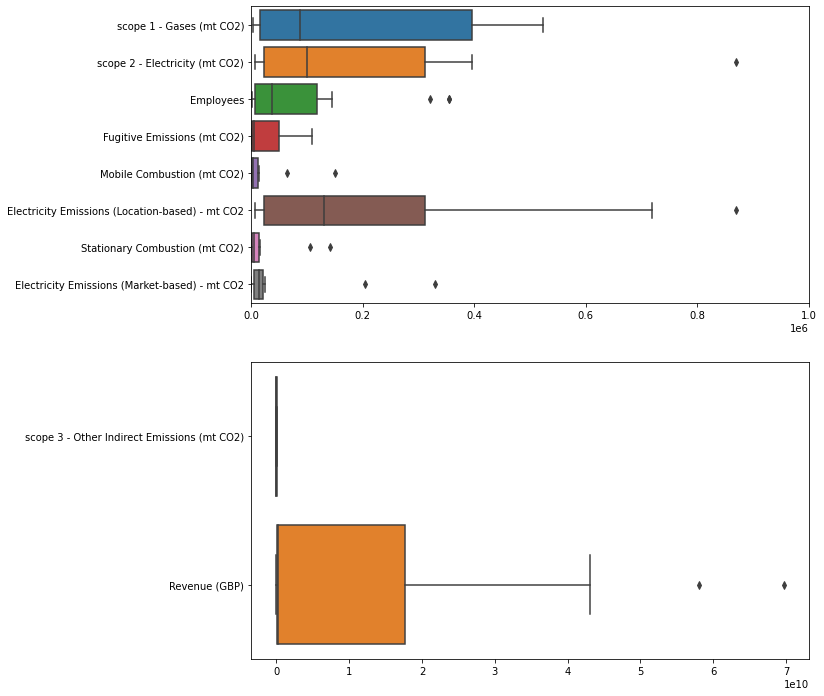

In [3]:
cols_small = ['scope 1 - Gases (mt CO2)', 'scope 2 - Electricity (mt CO2)',
            'Employees', 'Fugitive Emissions (mt CO2)', 'Mobile Combustion (mt CO2)',
            'Electricity Emissions (Location-based) - mt CO2', 'Stationary Combustion (mt CO2)',
            'Electricity Emissions (Market-based) - mt CO2']

cols_big = ['scope 3 - Other Indirect Emissions (mt CO2)', 
            'Revenue (GBP)', ]

fig, axes = plt.subplots(2, 1, figsize=(10,12))

sns.boxplot(data=df[cols_small], orient='h', ax = axes[0])
sns.boxplot(data=df[cols_big], orient='h', ax = axes[1])

axes[0].set_xlim(0, 1e6)
plt.show()

### Explanation:


First of all, I used the pandas `skew()` function to calculate the skewness of all variables. All of them are highly skewed, suggesting the existence of outliers. After doing that, I created box plot graphs for all the variables. Due to the different scales, I created one graph for variables with relatively small values, and one for those that have bigger ones. The box plots further confirm that most of the variables have some outliers. I decided not to create histograms for the variables because there aren't enough rows on the dataset to get meaningful plots.

# 2. Data Incompleteness/Prediction (≈20 min)

For several companies, there are gaps for certain sub-categories (Such as Scope 3 and Fugitive Emissions). Please decide on a data-filling approach, apply it and document your approach to filling in these incomplete cells. Note: using a standard filling technique with the median/mean may not work optimally in this scenario as companies also vary in other factors (ex:size), you may have to use a prediction model.


In [4]:
cols = df.columns[1:]

scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors=5)

array = scaler.fit_transform(df[cols])
array = imputer.fit_transform(array)
array = scaler.inverse_transform(array)

df_ = pd.DataFrame(array,columns = cols)

### Explanation:
I used the K-Nearest Neighbors imputer to fill the missing values. As it was noted, simple imputation techniques such as using the mean value wouldn't work on that dataset. The KNN imputer uses the mean value from the nearest neighbors of each row, making it a more advanced and robust imputation technique. I changed the order of part 2 and 3, because the outlier detection algorithm wouldn't work with NaN values, so I had to apply the imputer first.

# 3. Outlier Detection (≈20 min)

For Scope 1, Scope 2 and Scope 3 some companies may be wrongly under-reporting or simply have very green initiatives. Please formulate and apply a way to spot outliers in the data and then remove those outliers. Provide a short explanation of your method and why.

In [5]:
scope1 = df_['scope 1 - Gases (mt CO2)'].to_numpy().reshape(-1, 1)
scope2 = df_['scope 2 - Electricity (mt CO2)'].to_numpy().reshape(-1, 1)
scope3 = df_['scope 3 - Other Indirect Emissions (mt CO2)'].to_numpy().reshape(-1, 1)


od1 = IsolationForest(contamination = 0.15).fit_predict(scope1)
od2 = IsolationForest(contamination = 0.15).fit_predict(scope2)
od3 = IsolationForest(contamination = 0.15).fit_predict(scope3)

df_['scope 1 - Gases (mt CO2)'].mask(od1 == -1, inplace = True)
df_['scope 2 - Electricity (mt CO2)'].mask(od2 == -1, inplace = True)
df_['scope 3 - Other Indirect Emissions (mt CO2)'].mask(od3 == -1, inplace = True)


### Explanation

I used the Isolation Forest outlier detection algorithm to find the outliers for each variable. First of all, I created numpy arrays with the values of Scope 1-3. After doing that, I trained an Isolation Forest model for each variable. The model returns an array of 1 and -1 values for inliers and outliers respectively. Finally, I used those arrays to remove the outlier values from the pandas dataframe, using the `mask()` function.

Message nick@connect.earth any questions!